In [1]:
!ls

1-12					Pandas.ipynb
Agregaciones y series temporales.ipynb	people.csv
anaconda3				Pictures
a.py					Public
array_ejemplo.npy			quest
aux.tsv					quest2
Clase python.ipynb			quest3
cosas.csv				questions
Data					R
data.csv				Repos
derby.log				scripts
Desktop					seq1.txt
Documents				seq2.txt
Downloads				sql30-12
Ejercicios navidad.ipynb		studies.csv
ejs19y20				subjects.csv
first_dir				teaches.csv
hola.txt				Templates
mas_cosas.psv				Untitled.ipynb
metastore_db				Videos
Music


In [3]:
!ls -l Downloads

total 172652
-rw-rw-r-- 1 dsc dsc      9417 dic 15 09:21 Clase python.py
-rw-rw-r-- 1 dsc dsc      3450 nov 24 11:06 db-20181124T100614Z-001.zip
-rw-rw-r-- 1 dsc dsc 176774615 ene 11 17:56 krakenEUR.csv.gz


In [1]:
!zcat Downloads/krakenEUR.csv.gz | head -5

1389173189,624.010000000000,0.200000000000
1389173198,624.010000000000,0.097670000000
1389173198,623.538360000000,0.013579760000
1389173265,623.538360000000,0.148960240000
1389173339,623.540660000000,0.200000000000

gzip: stdout: Broken pipe


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Downloads/krakenEUR.csv.gz', header=None, names=["ts", "price", "volume"], index_col = 'ts')

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.head()

,price,volume
ts,,
1389173189,624.01000,0.20000
1389173198,624.01000,0.09767
1389173198,623.53836,0.01358
1389173265,623.53836,0.14896
1389173339,623.54066,0.20000


In [4]:
data.describe()

,price,volume
count,2.522749e+07,2.522749e+07
mean,4.603733e+03,4.201418e-01
std,3.477302e+03,1.541445e+00
min,1.481712e+02,0.000000e+00
25%,1.404612e+03,1.288000e-02
50%,3.906900e+03,5.949156e-02
75%,6.889300e+03,2.585900e-01
max,2.000000e+04,4.400000e+02


In [5]:
data.index[0]

1389173189

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  27752.,   34387.,   62918.,   47785.,   61890.,   60653.,
          31978.,   64491.,   61504.,   43065.,   25909.,   35501.,
          46574.,   32894.,   66441.,   29920.,   45794.,   40328.,
          37808.,   35491.,  100677.,   60571.,   60882.,   53097.,
          39460.,   44384.,   34881.,   47659.,   40008.,   51345.,
          44255.,   53826.,   87470.,   48406.,   42752.,   67906.,
         180596.,   91414.,  128411.,   74750.,   58447.,       0.,
              0.,  128477.,   77651.,   96060.,   81742.,  143414.,
         258119.,  175932.,   93490.,  145518.,   73669.,   77507.,
          67304.,   88298.,  129423.,  118806.,  115736.,  256553.,
         171552.,  206438.,  228763.,  466097.,  331810.,  278247.,
         588788.,  801235.,  638777.,  510525.,  576764.,  621319.,
         570370.,  587621.,  336202.,  436948.,  583949.,  513537.,
         748189.,  616753., 1251739., 1433628.,  811690.,  824681.,
         527199.,  574939.,  562189.,  483025., 

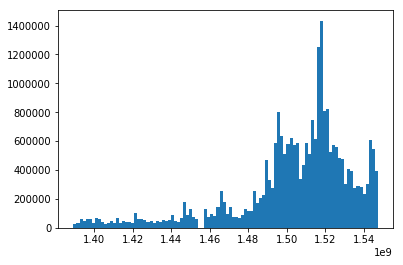

In [7]:
plt.hist(data.index, bins=100)

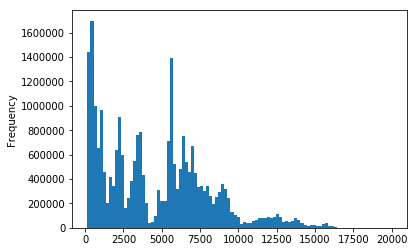

In [8]:
data["price"].plot(kind="hist", bins = 100)

In [9]:
sa = data.sample(100000)

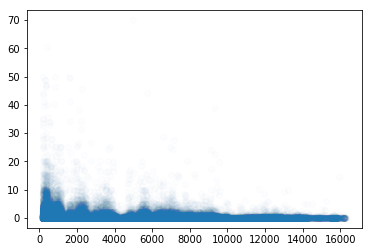

In [10]:
plt.scatter(sa["price"], sa["volume"], alpha=.01)

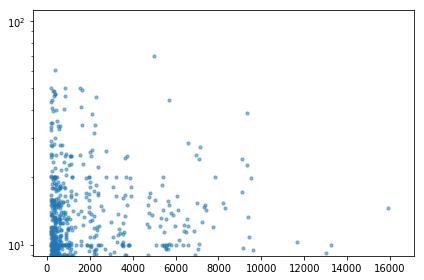

In [11]:
fig, ax = plt.subplots(1, 1)
ax.scatter(sa["price"], sa["volume"], alpha=.5, s=10)
plt.yscale("log")
plt.tight_layout()

In [12]:
data.iloc[0]

price     624.01
volume      0.20
Name: 1389173189, dtype: float64

In [13]:
data.index.min()

1389173189

In [14]:
data.index.max()

1547206159

In [15]:
pd.to_datetime(data.index[0], unit='s')

Timestamp('2014-01-08 09:26:29')

In [16]:
pd.to_datetime(data.index[-1], unit='s')

Timestamp('2019-01-11 11:29:19')

In [17]:
last_data = data.iloc[-1000000:]

In [18]:
last_data.shape

(1000000, 2)

In [19]:
last_data.index = pd.to_datetime(last_data.index, unit = 's')

In [20]:
last_data.head()

,price,volume
ts,,
2018-12-03 15:33:11,3396.7,1.130000
2018-12-03 15:33:11,3396.7,0.981000
2018-12-03 15:33:11,3397.0,0.800000
2018-12-03 15:33:11,3397.2,0.029000
2018-12-03 15:33:11,3397.9,0.131179


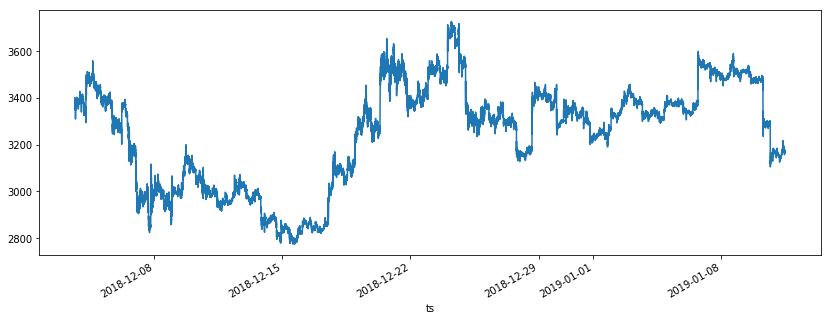

In [21]:
last_data["price"].plot(figsize=(14,5))

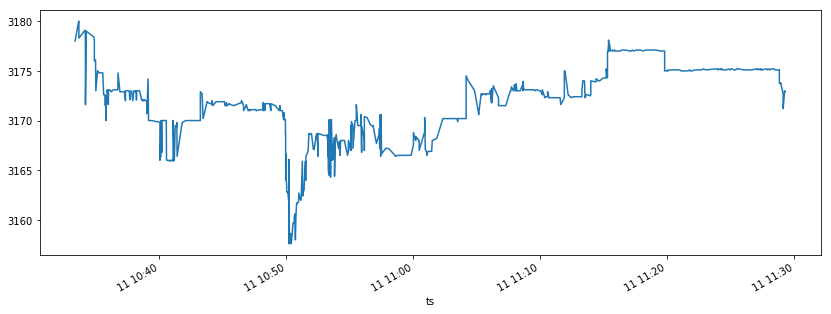

In [22]:
last_data.iloc[-1000:]["price"].plot(figsize=(14,5))

In [23]:
last_data["hour"] = last_data.index.hour

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
last_data.groupby("hour").count()

,price,volume
hour,,
0,37841,37841
1,23316,23316
2,20153,20153
3,15844,15844
4,13454,13454
5,21714,21714
6,27029,27029
7,27739,27739
8,42822,42822


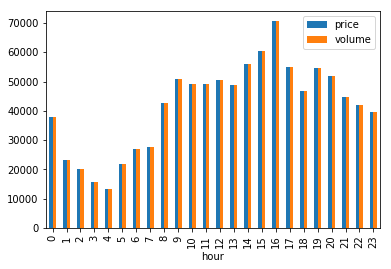

In [25]:
last_data.groupby("hour").count().plot(kind='bar')

In [26]:
mdata = last_data.resample("1h").agg(
        {"price": ["first", max, min, "last"],
        "volume": sum})

In [27]:
mdata.head()

price                              volume
                      first     max     min    last         sum
ts                                                             
2018-12-03 15:00:00  3396.7  3400.1  3354.7  3387.8  411.870300
2018-12-03 16:00:00  3387.8  3397.4  3310.2  3375.9  651.082013
2018-12-03 17:00:00  3375.8  3397.2  3362.1  3384.2  432.904973
2018-12-03 18:00:00  3387.7  3403.7  3370.7  3391.0  833.789759
2018-12-03 19:00:00  3389.3  3393.8  3370.0  3373.3  342.018550

In [28]:
mdata.columns = mdata.columns.droplevel(0)

In [29]:
mdata.head()

,first,max,min,last,sum
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


In [30]:
mdata.rename(columns={"first": "open", "max": "high", "min": "low", "last": "close", "sum": "volume"},
            inplace=True)

In [31]:
mdata.head()

,open,high,low,close,volume
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


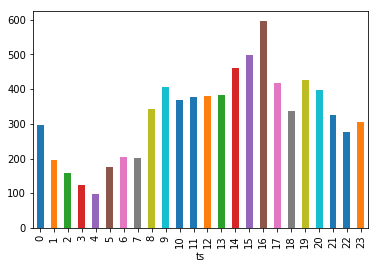

In [32]:
mdata.groupby(mdata.index.hour).mean()["volume"].plot(kind="bar")

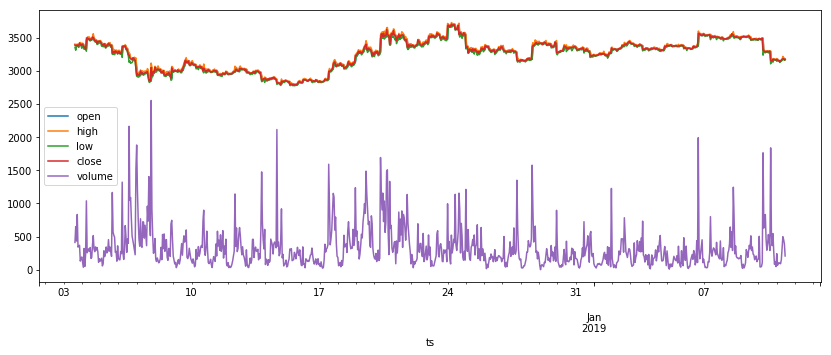

In [33]:
mdata.plot(figsize=(14,5))

In [34]:
mdata.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25227493 entries, 1389173189 to 1547206159
Data columns (total 2 columns):
price     float64
volume    float64
dtypes: float64(2)
memory usage: 577.4 MB


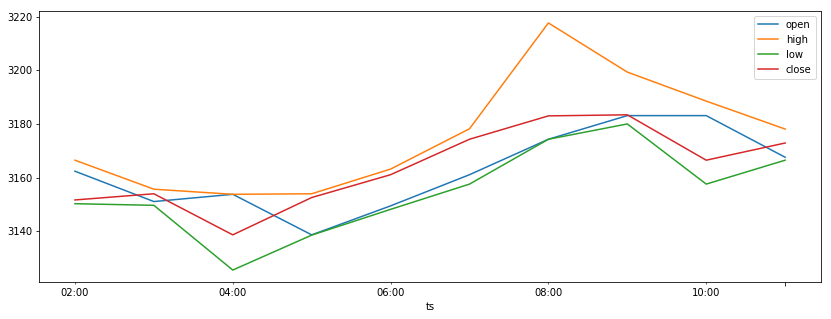

In [36]:
mdata[-10:].drop("volume", axis=1).plot(figsize=(14,5))

In [37]:
!pip install mpl_finance

In [38]:
from mpl_finance import candlestick2_ohlc

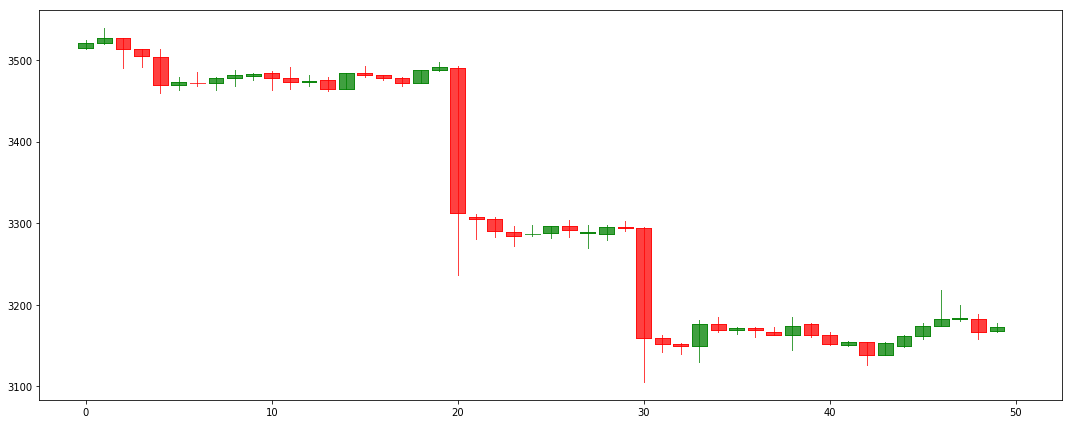

In [39]:
aux = mdata[-50:]
fig, ax = plt.subplots(1, 1, figsize=(15,6))
candlestick2_ohlc(ax, aux['open'], aux['high'], aux['low'], aux['close'], colorup='g', width=.8)
plt.tight_layout()

In [40]:
X = np.arange(0, 1, .005)
y = 2 * X + np.random.normal(.2, X)

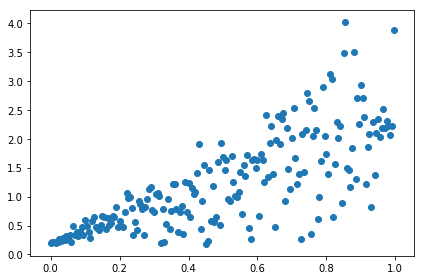

In [42]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
plt.tight_layout()

In [43]:
df = pd.DataFrame({'y': y})

In [45]:
df.head()

,y
0,0.200000
1,0.209339
2,0.214686
3,0.206033
4,0.222278


In [47]:
df["moving_avg"] = df.rolling(window=10).mean()

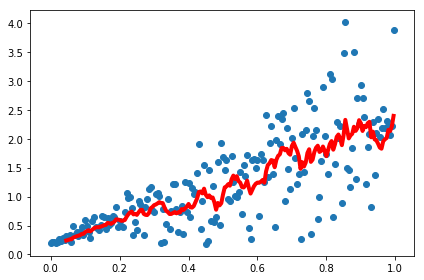

In [48]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y)
ax.plot(X, df["moving_avg"], c='r', lw=4)
plt.tight_layout()

In [51]:
for i in [2, 5, 10, 20, 50, 100]:
    df["moving_avg_{0}".format(i)] = df['y'].rolling(window=i).mean()

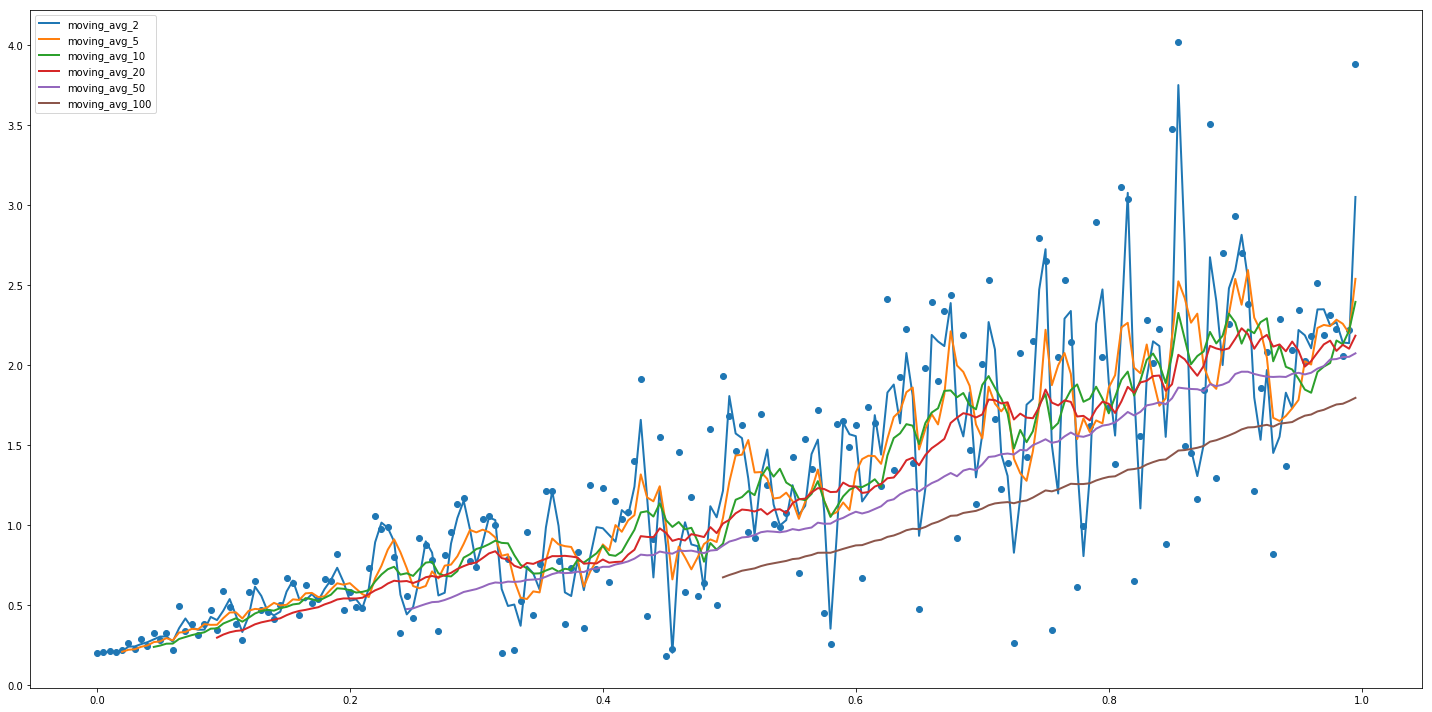

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.scatter(X, y)
for col in df.columns:
    if col.startswith("moving_avg_"):
        ax.plot(X, df[col], lw=2, label=col)
plt.legend()
plt.tight_layout()

In [58]:
X = np.arange(-1, 1, .005)
y = 2 * X ** 2 + np.random.normal(.2, np.abs(X))
df = pd.DataFrame({'y': y})

In [59]:
for i in [2, 5, 10, 20, 50, 100]:
    df["moving_avg_{0}".format(i)] = df['y'].rolling(window=i).mean()

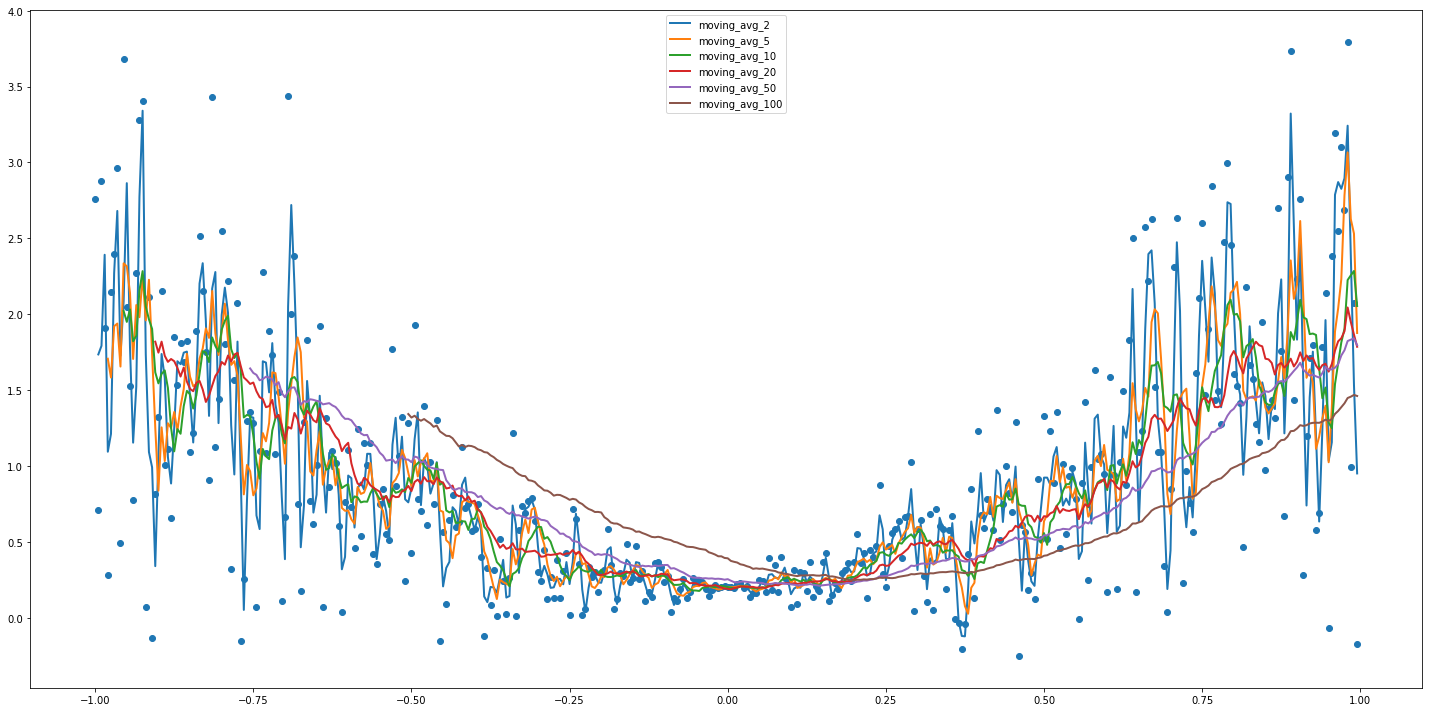

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.scatter(X, y)
for col in df.columns:
    if col.startswith("moving_avg_"):
        ax.plot(X, df[col], lw=2, label=col)
plt.legend()
plt.tight_layout()

In [61]:
mdata.head()

,open,high,low,close,volume
ts,,,,,
2018-12-03 15:00:00,3396.7,3400.1,3354.7,3387.8,411.870300
2018-12-03 16:00:00,3387.8,3397.4,3310.2,3375.9,651.082013
2018-12-03 17:00:00,3375.8,3397.2,3362.1,3384.2,432.904973
2018-12-03 18:00:00,3387.7,3403.7,3370.7,3391.0,833.789759
2018-12-03 19:00:00,3389.3,3393.8,3370.0,3373.3,342.018550


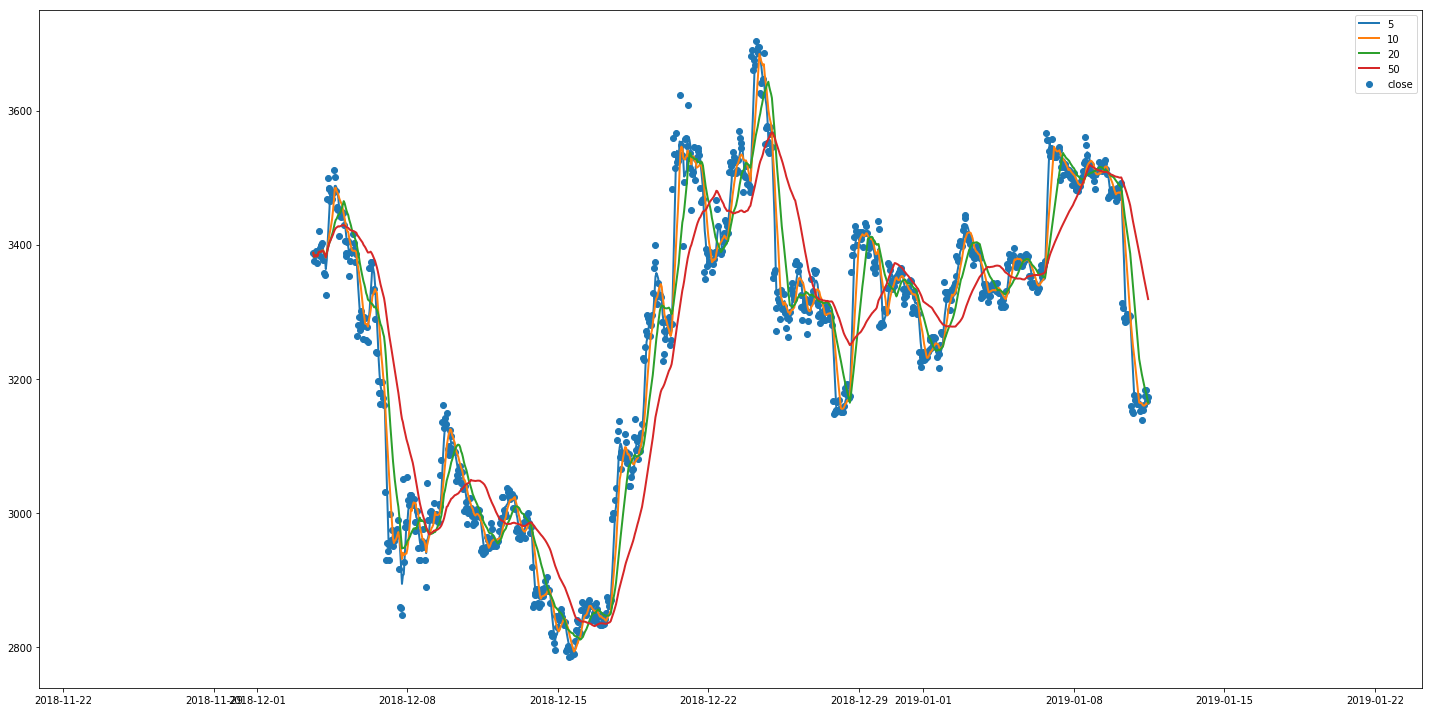

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.scatter(mdata.index, mdata['close'])

for i in [5, 10, 20, 50]:
    ax.plot(mdata.index, mdata['close'].rolling(window="{}h".format(i)).mean(), lw=2, label=i)

plt.legend()
plt.tight_layout()    

In [65]:
mdata['close'].rolling(window="5h").mean()

ts
2018-12-03 15:00:00    3387.800000
2018-12-03 16:00:00    3381.850000
2018-12-03 17:00:00    3382.633333
2018-12-03 18:00:00    3384.725000
2018-12-03 19:00:00    3382.440000
2018-12-03 20:00:00    3382.880000
2018-12-03 21:00:00    3391.720000
2018-12-03 22:00:00    3393.860000
2018-12-03 23:00:00    3392.400000
2018-12-04 00:00:00    3397.740000
2018-12-04 01:00:00    3400.300000
2018-12-04 02:00:00    3391.740000
2018-12-04 03:00:00    3384.340000
2018-12-04 04:00:00    3378.560000
2018-12-04 05:00:00    3363.560000
2018-12-04 06:00:00    3376.600000
2018-12-04 07:00:00    3400.940000
2018-12-04 08:00:00    3426.120000
2018-12-04 09:00:00    3452.040000
2018-12-04 10:00:00    3480.060000
2018-12-04 11:00:00    3482.320000
2018-12-04 12:00:00    3476.240000
2018-12-04 13:00:00    3475.040000
2018-12-04 14:00:00    3480.360000
2018-12-04 15:00:00    3487.540000
2018-12-04 16:00:00    3487.800000
2018-12-04 17:00:00    3484.840000
2018-12-04 18:00:00    3480.440000
2018-12-04 19:00:

In [68]:
for window in [1, 3, 5, 10, 30, 60, 120, 180, 240, 300, 480, 600]:
    mdata["ma{}".format(window)] = mdata["close"].rolling(window).mean()

In [69]:
mdata.tail()

,open,high,low,close,volume,ma1,ma3,ma5,ma10,ma30,ma60,ma120,ma180,ma240,ma300,ma480,ma600
ts,,,,,,,,,,,,,,,,,
2019-01-11 07:00:00,3161.1,3178.2,3157.6,3174.3,326.359000,3174.3,3162.666667,3156.14,3160.01,3248.436667,3372.576667,3433.575000,3406.033889,3389.719583,3373.993333,3380.044583,3362.227333
2019-01-11 08:00:00,3174.3,3217.6,3174.3,3183.0,498.701336,3183.0,3172.800000,3161.94,3161.40,3238.600000,3367.231667,3432.330000,3405.154444,3389.393750,3373.321000,3379.622708,3362.752833
2019-01-11 09:00:00,3183.1,3199.3,3180.0,3183.4,455.695288,3183.4,3180.233333,3170.88,3163.47,3228.996667,3361.878333,3431.069167,3404.291667,3389.132500,3372.483000,3379.031667,3363.290833
2019-01-11 10:00:00,3183.1,3188.5,3157.6,3166.5,392.112061,3166.5,3177.633333,3173.66,3162.77,3218.270000,3356.188333,3429.447500,3403.323889,3388.735833,3371.624667,3378.432917,3363.789667
2019-01-11 11:00:00,3167.6,3178.1,3166.5,3172.9,207.689381,3172.9,3174.266667,3176.02,3163.82,3207.656667,3350.810000,3427.805000,3402.442222,3388.414167,3371.273333,3377.901458,3364.294500


In [70]:
ma_cols = [x for x in mdata.columns if x.startswith("ma")]

In [71]:
ma_cols

['ma1',
 'ma3',
 'ma5',
 'ma10',
 'ma30',
 'ma60',
 'ma120',
 'ma180',
 'ma240',
 'ma300',
 'ma480',
 'ma600']

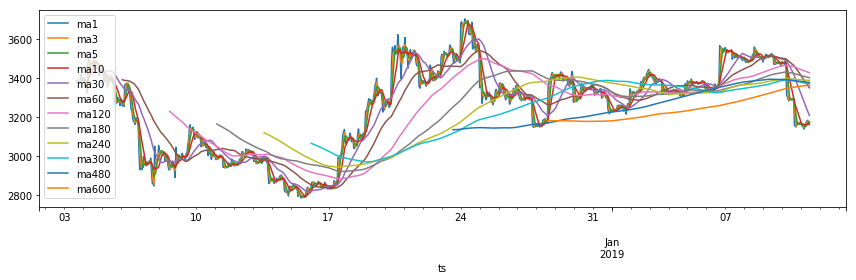

In [73]:
fig, ax = plt.subplots(figsize=(12, 4))
for col in ma_cols:
    mdata[col].plot(ax=ax, label=col)
plt.legend()
plt.tight_layout()

In [75]:
seriea = mdata['ma1'] >= mdata['ma10']
serieb = mdata['ma1'] < mdata['ma10']

In [76]:
df = pd.DataFrame({'b': serieb, 'nb': serieb.shift(-1)}, index=serieb.index)

In [77]:
df.head()

,b,nb
ts,,
2018-12-03 15:00:00,False,False
2018-12-03 16:00:00,False,False
2018-12-03 17:00:00,False,False
2018-12-03 18:00:00,False,False
2018-12-03 19:00:00,False,False


In [119]:
buy = df["b"] & (df["nb"]==False)
sell = (df["b"]==False) & df["nb"]

In [117]:
buy[buy == True]

ts
2018-12-04 05:00:00    True
2018-12-05 10:00:00    True
2018-12-05 23:00:00    True
2018-12-06 04:00:00    True
2018-12-07 08:00:00    True
2018-12-07 18:00:00    True
2018-12-07 20:00:00    True
2018-12-08 06:00:00    True
2018-12-08 17:00:00    True
2018-12-08 21:00:00    True
2018-12-09 07:00:00    True
2018-12-09 10:00:00    True
2018-12-10 21:00:00    True
2018-12-11 04:00:00    True
2018-12-11 07:00:00    True
2018-12-11 16:00:00    True
2018-12-12 05:00:00    True
2018-12-12 22:00:00    True
2018-12-13 08:00:00    True
2018-12-13 11:00:00    True
2018-12-14 05:00:00    True
2018-12-14 21:00:00    True
2018-12-14 23:00:00    True
2018-12-15 18:00:00    True
2018-12-16 08:00:00    True
2018-12-16 18:00:00    True
2018-12-16 23:00:00    True
2018-12-17 04:00:00    True
2018-12-18 02:00:00    True
2018-12-18 06:00:00    True
                       ... 
2018-12-25 18:00:00    True
2018-12-26 16:00:00    True
2018-12-27 10:00:00    True
2018-12-28 04:00:00    True
2018-12-28 06:00: